<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"></ul></div>

In [2]:
import ipywidgets as widgets
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from ipywidgets import Layout
import matplotlib.gridspec as gridspec

In [4]:
df = pd.read_csv("/home/marco/gdrive/research/simulation/summary_3.csv")
df.head()

,nrE,nrI,p0,S0,nrE.1,nrI.1,avgp0_E,avgp0_I,nr_E_1,nr_I_1,...,avgp0_E_3,avgp0_I_3,bayesE_3,bayesI_3,nrE_3,nrI_3,avgp0_E_3.1,avgp0_I_3.1,nE,nI
0,1000,500,0.158114,0.126491,523,0,0.161440,NaN,71,0,...,0.165335,0.188638,0.175000,0.160563,4,7,0.167268,0.165403,4,7
1,1000,500,0.223607,0.178885,956,0,0.272637,NaN,219,0,...,0.280202,0.325968,0.309160,0.267782,14,13,0.285993,0.349101,14,13
2,1000,500,0.273861,0.219089,973,0,0.331633,NaN,261,0,...,0.331253,0.324717,0.291667,0.273913,34,20,0.323336,0.349193,34,20
3,1000,500,0.316228,0.252982,990,0,0.381601,NaN,318,0,...,0.377031,0.379775,0.397368,0.371542,49,31,0.381098,0.418638,49,31
4,1000,500,0.353553,0.282843,997,0,0.425492,NaN,346,0,...,0.409574,0.384390,0.420290,0.376471,58,33,0.411717,0.423808,58,33


In [31]:
def plotLines(val):
    ax = plt.gca()
    ddf = df[ df["nrI"]==val]
    X = ddf["p0"]
    Y1 = ddf["nE"]
    Y2 = ddf["nI"]
    ax.plot(X,Y1, "-o") 
    ax.plot(X,Y2, "-o")
    title = "Exp = 1000 vs. Inexp = " + str(val)
    ax.set_title(title, fontsize=8)
    ax.set_xlabel(r"$p_0$", fontsize=8)
    ax.set_ylabel("Cum Survival", fontsize=8)
    ax.legend(["E", "I"])
    
def on_buttonSel_clicked(b):
    fig = plt.gcf()
    plt.clf()
    # count nr of checkbox
    nr = 0
    selection = []
    for cb in checkboxes:
        if cb.value == True:
            selection.append(int(cb.description))
    nr = len(selection)
    if nr == 4:
        gs = gridspec.GridSpec(2,2)
        row = 0
        col = 0
        for nn in selection:
            ax=plt.subplot(gs[row,col])
            plotLines(nn)
            if col == 0:
                col += 1
            else:
                row += 1
                col = 0
    else:
        nrows = int(np.ceil(nr/3))
        ncols = min(nr, 3)
        gs = gridspec.GridSpec(nrows,ncols)
        gs.update(wspace=0.5,hspace=0.5)
        i = 0
        j = 0
        for nn in selection:
            ax=plt.subplot(gs[i,j])
            plotLines(nn)
            if j < 2:
                j += 1
            else:
                i += 1
                j = 0

def on_buttonAll_clicked(b):
    gs = gridspec.GridSpec(2,3)
    gs.update(hspace=0.5, wspace=0.5)
    i = 0
    j = 0
    for nn in nN:
        ax=plt.subplot(gs[i,j])
        plotLines(nn)
        if j < 2:
            j += 1
        else:
            i += 1
            j = 0


<IPython.core.display.Javascript object>


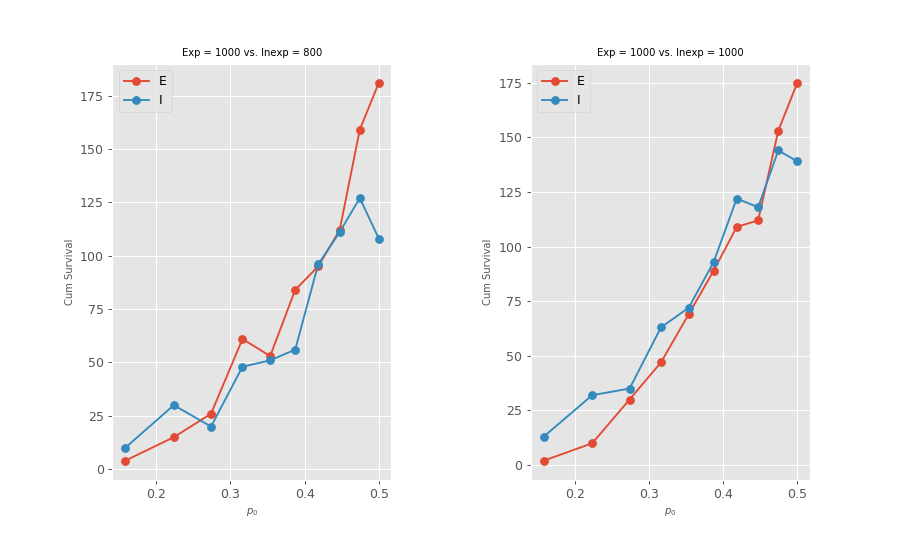

In [32]:
%matplotlib notebook

caption = widgets.Label(value='Select Nr. of Inexperienced', layout=Layout(width='50%', height='20px'))
display(caption)
#%matplotlib inline
nN = [800,  900, 1000, 1100, 1200, 1500]
container = widgets.HBox()
display(container)

plt.style.use('ggplot')
plt.close()
fig = plt.figure(figsize=(10,6))
checkboxes = []
for n in nN:
    checkboxes.append(widgets.Checkbox(
    value=False,
    description=str(n),
    disabled=False
    ))

plt.show()
contCB = widgets.HBox([cb for cb in checkboxes])
display(contCB)
buttonAll = widgets.Button(description="Run Simulation All")
buttonSel = widgets.Button(description="Run Simulation Selection")
contButtons = widgets.HBox([buttonAll, buttonSel])
display(contButtons)
    
buttonAll.on_click(on_buttonAll_clicked)
buttonSel.on_click(on_buttonSel_clicked)
plt.show()